In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('bond_movies.csv')

# Fixing IMDb data for unreleased movie
df.at[24, 'actor'] = 'Daniel Craig'

df

,title,year,actor,imdb_rating,imdb_votes,imdb_url
0,Dr. No,1962,Sean Connery,7.3,138645.0,https://www.imdb.com/title/tt0055928/
1,From Russia with Love,1963,Sean Connery,7.4,109986.0,https://www.imdb.com/title/tt0057076/
2,Goldfinger,1964,Sean Connery,7.7,163127.0,https://www.imdb.com/title/tt0058150/
3,Thunderball,1965,Sean Connery,7.0,98754.0,https://www.imdb.com/title/tt0059800/
4,You Only Live Twice,1967,Sean Connery,6.9,91401.0,https://www.imdb.com/title/tt0062512/
5,On Her Majesty's Secret Service,1969,George Lazenby,6.7,74720.0,https://www.imdb.com/title/tt0064757/
6,Diamonds Are Forever,1971,Sean Connery,6.6,89648.0,https://www.imdb.com/title/tt0066995/
7,Live and Let Die,1973,Roger Moore,6.8,90748.0,https://www.imdb.com/title/tt0070328/
8,The Man with the Golden Gun,1974,Roger Moore,6.8,89661.0,https://www.imdb.com/title/tt0071807/
9,The Spy Who Loved Me,1977,Roger Moore,7.1,92407.0,https://www.imdb.com/title/tt0076752/


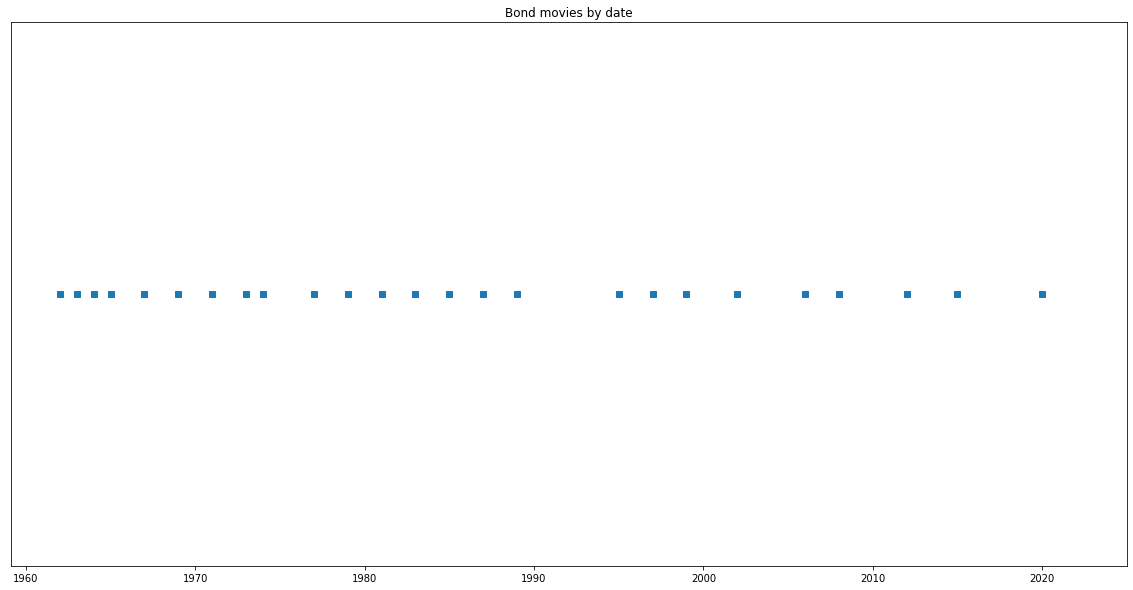

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(df['year'], pd.Series(np.linspace(1, 1, 25)), 's')

plt.title('Bond movies by date')

frame1 = plt.gca()
frame1.axes.yaxis.set_visible(False)
plt.xlim(xmax=1960)
plt.xlim(xmax=2025)

plt.show()

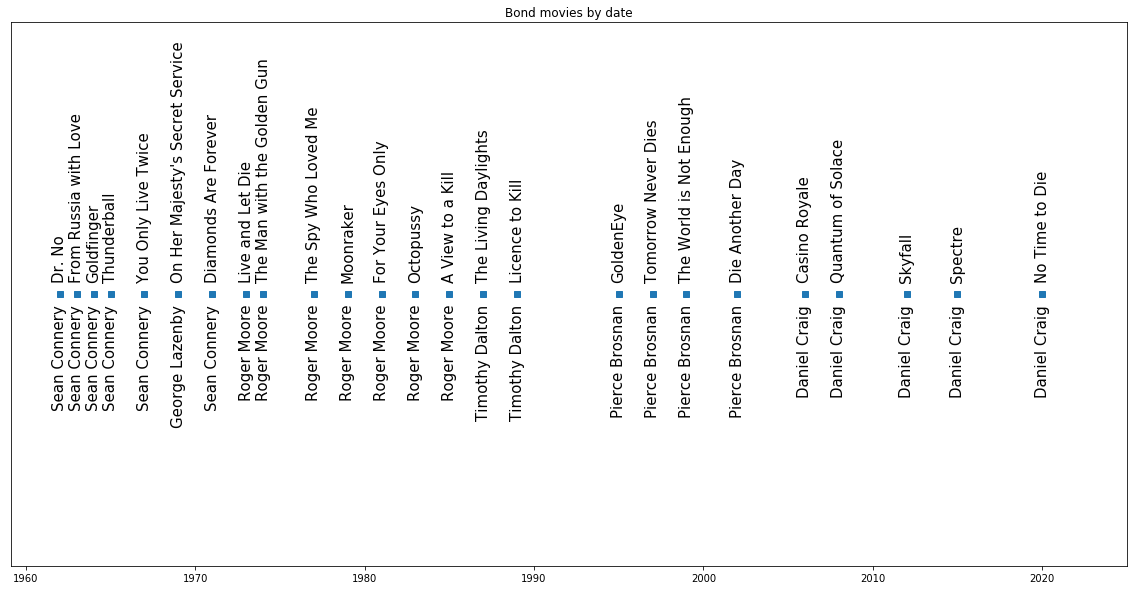

In [3]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(df['year'], pd.Series(np.linspace(1, 1, 25)), 's')

frame1 = plt.gca()
frame1.axes.yaxis.set_visible(False)
plt.xlim(xmax=1960)
plt.xlim(xmax=2025)

def dump(obj):
  for attr in dir(obj):
    print("obj.%s = %r" % (attr, getattr(obj, attr)))
    
plt.title('Bond movies by date')
#dump(plt.annotate)

for x, y, title, actor in zip(df['year'], pd.Series(np.linspace(1, 1, 25)), df['title'], df['actor'],):
    plt.annotate(title,
                (x,y),
                textcoords="offset points",
                xytext=(0, 15),
                rotation=90,
                fontsize=15,
                ha='center')
    
    plt.annotate(actor,
                (x,y),
                textcoords="offset points",
                xytext=(0, -10),
                rotation=90,
                fontsize=15,
                ha='center',
                verticalalignment='top')


plt.show()

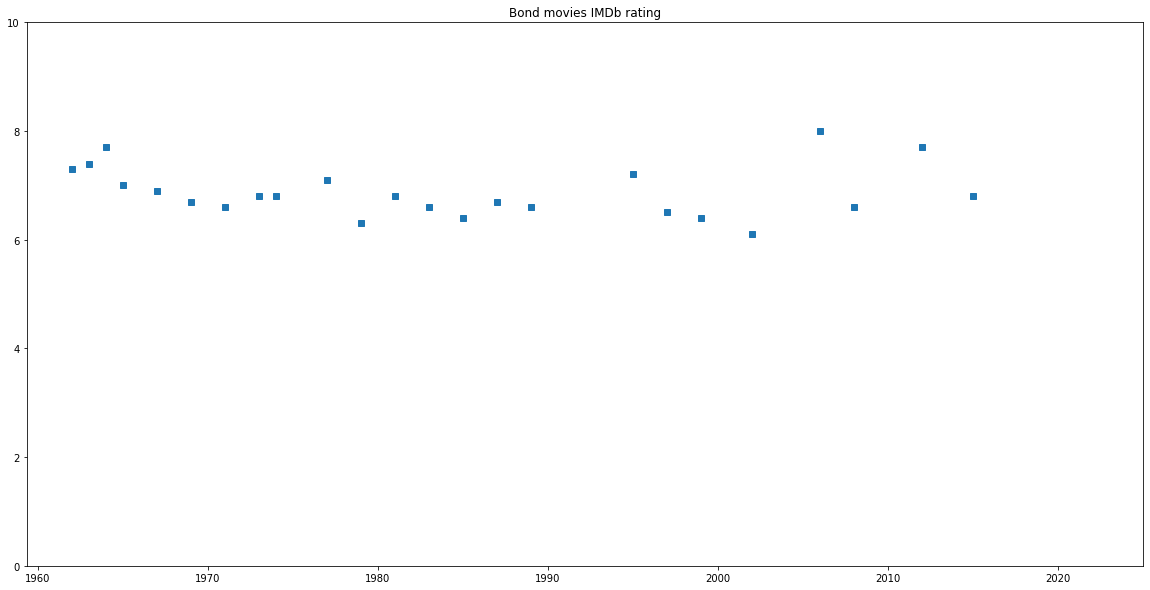

In [4]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(df['year'],df['imdb_rating'], 's')

plt.title('Bond movies IMDb rating')

frame1 = plt.gca()
plt.xlim(xmax=1960)
plt.xlim(xmax=2025)
plt.ylim(ymin=0)
plt.ylim(ymax=10)
plt.show()

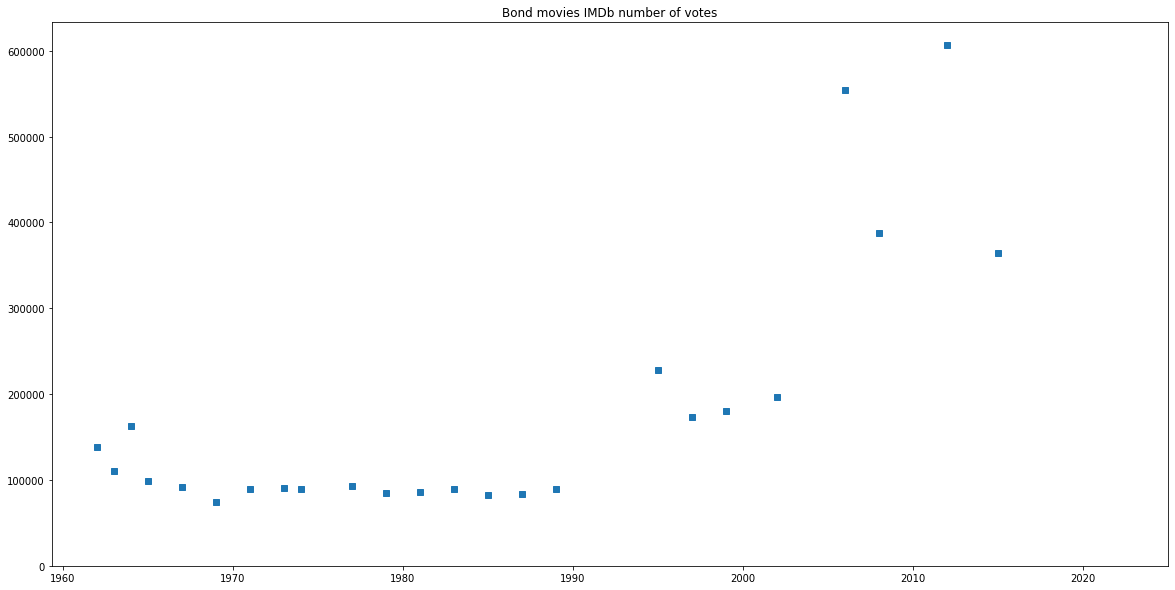

In [5]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(df['year'],df['imdb_votes'], 's')

plt.title('Bond movies IMDb number of votes')

frame1 = plt.gca()
plt.xlim(xmax=1960)
plt.xlim(xmax=2025)
plt.ylim(ymin=0)

plt.show()

In [6]:
df.at[24, 'imdb_rating'] = 'NaN'

df.at[24, 'imdb_rating'] = 6

df2 = df.groupby('actor').agg({'imdb_rating' : np.mean,
                         'imdb_votes': np.sum,
                         'actor' : np.size}).rename(columns = {'actor':'count'}).sort_values('imdb_rating', ascending=False)
df2

,imdb_rating,imdb_votes,count
actor,,,
Sean Connery,7.150000,691561.0,6
Daniel Craig,7.020000,1913163.0,5
George Lazenby,6.700000,74720.0,1
Roger Moore,6.685714,616897.0,7
Timothy Dalton,6.650000,172439.0,2
Pierce Brosnan,6.550000,778803.0,4


(0.0, 10)

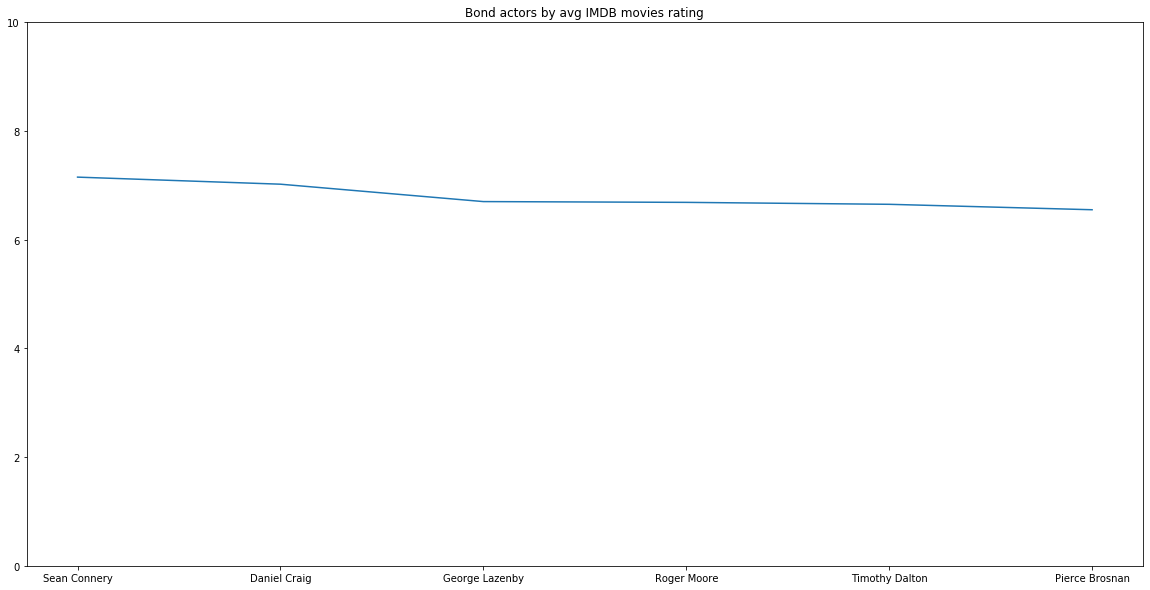

In [7]:
plt.rcParams["figure.figsize"] = (20,10)

plt.title('Bond actors by avg IMDB movies rating')

plt.plot(df2['imdb_rating'])
plt.ylim(ymin=0)
plt.ylim(ymax=10)